# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БСТ2105 Гусельников Г. М.
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [3]:
import random
import math
import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

1 - для генерации матрицы смежности,
2 - для вызова из файла: 2
Матрица смежности:
[0, 3, 1, 3, 0, 0]
[3, 0, 4, 0, 0, 0]
[1, 4, 0, 0, 7, 5]
[3, 0, 0, 0, 0, 2]
[0, 0, 7, 0, 0, 4]
[0, 0, 5, 2, 4, 0]


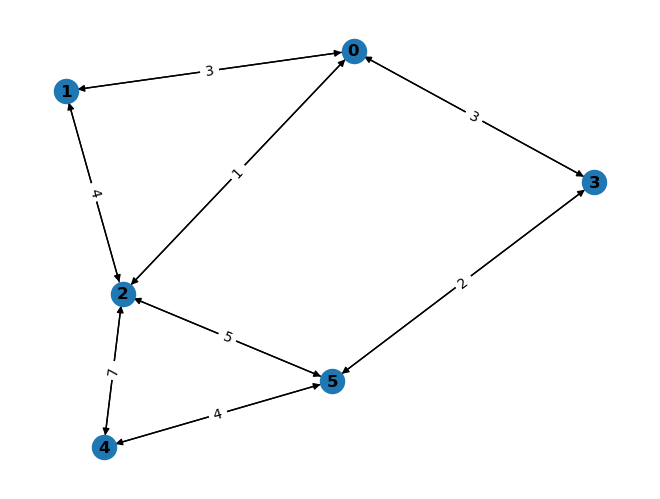

In [143]:
def generate_adj_matrix(num_nodes, density):
    """
    Генерирует матрицу смежности для ориентированного графа с заданным числом узлов и плотностью связей.
    :param num_nodes: количество узлов в графе
    :param density: плотность связей в графе (от 0 до 1)
    """
    min, max = int(input("Введите мин значение для пути: ")), int(input("Введите макс значение для пути: "))
    
    # Создаем пустую матрицу смежности
    adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    
    # Заполняем матрицу смежности ребрами
    for i in range(num_nodes):
        for k in range(0, i):
            adj_matrix[i][k] = adj_matrix[k][i]
        for j in range(i, num_nodes):
            if i == j:
                adj_matrix[i][j] = 0
            elif random.random() < density:
                weight = random.randint(min, max)
                adj_matrix[i][j] = weight
    
    return adj_matrix

question = int(input("1 - для генерации матрицы смежности,\n2 - для вызова из файла: "))
if question == 1:
    adj_matrix = generate_adj_matrix(int(input("Введите количество вершин: ")), 0.6)
else:
    with open("sources/matrix1.txt", "r") as f: 
        adj_matrix = []
        for str in f:
            adj_matrix.append(list(map(int, str.split())))

# Выводим матрицу смежности на экран
print("Матрица смежности:")
for row in adj_matrix:
    print(row)
    
#Выводим граф на экран
G = nx.from_numpy_matrix(np.matrix(adj_matrix), create_using=nx.DiGraph)
layout = nx.spring_layout(G)
edge_weight = nx.get_edge_attributes(G, "weight")
nx.draw(G, layout, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_weight)
plt.show()


for i in range(len(adj_matrix)):
        for j in range(len(adj_matrix)):
            if i != j and adj_matrix[i][j] == 0:
                adj_matrix[i][j] = math.inf

## Алгоритм Флойда-Уоршелла

In [144]:
def floyd(adj_matrix, start, end):
    
    def get_path(P, u, v):
        path = [u]
        while u != v:
            u = P[u][v]
            path.append(u)
        return path
    
    matrix = copy.deepcopy(adj_matrix)
    
    N = len(matrix)                                 # число вершин в графе
    P = [[v for v in range(N)] for u in range(N)]       # начальный список предыдущих вершин для поиска кратчайших маршрутов
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = matrix[i][k] + matrix[k][j]
                if matrix[i][k] < math.inf and matrix[k][j] < math.inf and matrix[i][j] > matrix[i][k] + matrix[k][j]:
                    matrix[i][j] = matrix[i][k] + matrix[k][j]
                    P[i][j] = P[i][k]     # номер промежуточной вершины при движении от i к j
                    
    min_path = get_path(P, start, end)
    
    if len(min_path) == 2 and matrix[start][end] == math.inf:
        return [], 0
    
    return min_path, matrix[start][end]

In [145]:
start, end = int(input("Start: ")), int(input("End: "))
path, dist = floyd(adj_matrix, start, end)
print(f"{path} минимальный путь, {dist} минимальное расстояние")

Start: 0
End: 4
[0, 2, 4] минимальный путь, 8 минимальное расстояние


### Алгоритм Дейкстры

In [159]:
def dijkstra(adj_matrix, start, end):
    
    matrix = copy.deepcopy(adj_matrix)
    
    dist = [math.inf for item in matrix] # последняя строка таблицы Дейкстры
    dist[start] = 0 #начинаем со стартового узла (для него длина пути 0 соотвественно)
    next_node = start #следующий узел для работы (с минимальной длиной пути)
    paths = [[start] for item in matrix]
    next_dist = dist.copy()
    for k in range(len(dist)):
        for i in range(len(dist)):
            if matrix[next_node][i] != math.inf and dist[next_node] != math.inf and dist[i] > matrix[next_node][i] + dist[next_node]:
                dist[i] = matrix[next_node][i] + dist[next_node]
                next_dist[i] = dist[i]
                paths[i] = paths[next_node].copy()
                paths[i].append(i) #обновляем путь до узла
        next_dist[next_node] = math.inf
        next_node = min(range(len(next_dist)), key = next_dist.__getitem__) #выбираем следующий минимальный узел среди оставшихся
    if len(paths[end]) == 1:
        return [],0
    return paths, dist

In [163]:
start, end = int(input("Start: ")), int(input("End: "))
path, dist = dijkstra(adj_matrix, start, end)
print(f"{path[end]} минимальный путь, {dist[end]} минимальное расстояние")

Start: 0
End: 4
[0, 2, 4] минимальный путь, 8 минимальное расстояние


### Алгоритм Беллмана-Форда

In [148]:
def bellman_ford(adj_matrix, start, end):
    matrix = copy.deepcopy(adj_matrix)
    
    path_lengths = [math.inf for item in matrix]
    path_lengths[start] = 0
    paths = [[start] for item in matrix]
    n = len(matrix)
    
    for i in range(n):
        for u in range(n):
             for v in range(n):
                    if path_lengths[u] != math.inf and matrix[u][v] != math.inf and path_lengths[v] > path_lengths[u] + matrix[u][v]:
                        path_lengths[v] = path_lengths[u] + matrix[u][v]
                        paths[v] = paths[u].copy()
                        paths[v].append(v)
    if len(paths[end]) == 1:
        return [],0
    return paths, path_lengths

In [149]:
start, end = int(input("Start: ")), int(input("End: "))
path, dist = bellman_ford(adj_matrix, start, end)
print(f"{path[end]} минимальный путь, {dist[end]} минимальное расстояние")

Start: 0
End: 4
[0, 2, 4] минимальный путь, 8 минимальное расстояние


### Алгоритм Джонсона

In [172]:
def johnson(adj_matrix, start, end):
    
    matrix = copy.deepcopy(adj_matrix)
    
    n = len(matrix)
    mat_new = matrix.copy() #создаем матрицу смежности с новой вершиной
    for item in mat_new:
        item.append(math.inf) #прежние вершины не имеют пути до новой
    mat_new.append([])
    for i in range(len(mat_new)):
        mat_new[-1].append(0) # длина ребер от новой вершины до старых равняется нулю
    paths, bell_dist = bellman_ford(mat_new, len(mat_new)-1, 0) #применяем алогритм Беллмана_форда для обновленного графа
    for u in range(n):
        for v in range(n):
            if matrix[u][v] != math.inf and bell_dist[u] != math.inf and bell_dist[v] != math.inf:
                matrix[u][v] += bell_dist[u] - bell_dist[v] #изменяем значения рёбер по формуле
    final_dist = []
    final_paths = []
    for i in range(n-1): #применяем алгоритм Дейкстры для графа с обновленными весами рёбер
            path, dist = dijkstra(matrix, i, n-1)
            final_dist.append(dist)
            final_paths.append(path)
    final_dist.append([])
    final_paths.append([])
    for i in range(n):
        final_paths[-1].append([end])
        if i == n-1:
            final_dist[-1].append(start)
        else:
            final_dist[-1].append(math.inf)
    if len(final_paths[start][end]) == 1:
        return [], 0
    return final_paths, final_dist

In [173]:
start, end = int(input("Start: ")), int(input("End: "))
path, dist = johnson(adj_matrix, start, end)
print(f"{path[end][start]} минимальный путь, {dist[start][end]} минимальное расстояние")

Start: 0
End: 4
[4, 2, 0] минимальный путь, 8 минимальное расстояние


### Алгоритм Левита

In [174]:
def levit(adj_matrix, start, end):
    
    matrix = copy.deepcopy(adj_matrix)
    n = len(matrix)
    
    M0 = set() #множество вершин, расстояния до которых уже вычислены (возможно неокончательно)
    M1 = {'main': [start], 'urgent': []} #вершины, расстояния до которых вычисляются
    M2 = set(range(1, n+1)) #вершины, расстояния до которых ещё не вычислены
    dist = [math.inf for item in matrix]
    dist[start] = 0
    paths = [[start] for item in matrix]
    while len(M1['main']) or len(M1['urgent']):
        if len(M1['urgent']):
            u = M1['urgent'].pop(0)
        else:
            u = M1['main'].pop(0)
        for v in range(n):
            if dist[u] == math.inf or matrix[u][v] == math.inf:
                continue
            if v in M2:
                M2.remove(v)
                M1['main'].append(v)
                if dist[v] > dist[u] + matrix[u][v]:
                    paths[v] = paths[u].copy()
                    paths[v].append(v)
                    dist[v] = dist[u] + matrix[u][v]
            elif v in M1['main'] or v in M1['urgent']:
                if dist[v] > dist[u] + matrix[u][v]:
                    paths[v] = paths[u].copy()
                    paths[v].append(v)
                    dist[v] = dist[u] + matrix[u][v]
            elif v in M0 and dist[v] > dist[u] + matrix[u][v]:
                M0.remove(v)
                M1['urgent'].append(v)
                dist[v] = dist[u] + matrix[u][v]
                paths[v] = paths[u].copy()
                paths[v].append(v)
        M0.add(u)
    if len(paths[end]) == 1:
             return [], 0
    return paths, dist

In [175]:
start, end = int(input("Start: ")), int(input("End: "))
path, dist = levit(adj_matrix, start, end)
print(f"{path[end]} минимальный путь, {dist[end]} минимальное расстояние")

Start: 0
End: 4
[0, 2, 4] минимальный путь, 8 минимальное расстояние


### Алгоритм Йена

In [188]:
def yen(adj_matrix, start, end, K=0): #K = число мин. путей которые можно найти (нумерация с нуля)
    
    matrix = copy.deepcopy(adj_matrix)  # создаем копию исходной матрицы, т.к. по ходу выполнения будем менять графы
    n = len(matrix)
    
    candidates = set()
    original_paths, original_dists = dijkstra(adj_matrix, start, end)
    paths = [original_paths[end]]
    lengths = [original_dists[end]]
    for k in range(K):
        for i in range(len(paths[-1])-1):
            #постепенно выбираем корневой путь и вершину ветвления
            spur_node = paths[-1][i]
            root_path = paths[-1][:i+1]
            for j in range(len(root_path)): #удаляем из графа вершины, идущие в пути перед вершиной ветвления (к ним мы не можем возвращаться)
                if root_path[j] != spur_node:
                    matrix[root_path[j]] = [math.inf for l in range(len(matrix))]
            for path in paths: #в списке path находим пути, которые начинаются с корневого пути
                if root_path == path[:i+1]:
                    matrix[path[i]][path[i+1]] = math.inf #удаляем следующие ребра в найденных путях, чтоб начать минимальное ветвление
            original_paths, original_dists = dijkstra(matrix, spur_node, end) # находим кратчайший путь в изменёном графе
            if len(original_paths):
                total_dist = 0
                spur_path = original_paths[end][1:] #определяем путь ветвления без начальной вершины в найденном пути, т.к. она есть в корневом пути
                total_path = root_path
                total_path.extend(spur_path)
                total_path = tuple(total_path) #преобразовываем список в кортеж, чтобы добавить его в набор кандидатов
                for j in range(len(total_path)-1):
                    total_dist += adj_matrix[total_path[j]][total_path[j+1]]
                candidates.add((total_path, total_dist))
        if not candidates:
            break
        sorted_candidates = list(candidates) # преобразовавыем набор кандидатов в список чтобы остортировать его по длинам маршртуа
        sorted_candidates.sort(key = lambda x: x[1])
        paths.append(list(sorted_candidates[0][0])) #добавляем в список paths минимальный путь
        lengths.append(sorted_candidates[0][1])
        candidates.remove(sorted_candidates[0]) # удаляем минимальный путь из набора кандидатов
    return paths, lengths

In [194]:
start, end = int(input("Start: ")), int(input("End: "))
path, dist = yen(adj_matrix, start, end)
print(f"{path} минимальный путь, {dist[0]} минимальное расстояние")

Start: 0
End: 4
[[0, 2, 4]] минимальный путь, 8 минимальное расстояние


## Вывод

В ходе данной лабораторной работы были реализованы алгоритмы нахождения кратчайшего пути на графе и определены зависимости времени исполнения алгоритма от числа узлов и ребер графа: